In [ ]:
#data_clean_bfclean.csv
# PID : name of owner
#ST_NUM and ST_NAME : Real estate address
#OWN_OCCUPIED : (Y/N)
#NUM_BEDROOM, NUM_BATH
#SQ_M : Area in the House

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/data_clean_bfclean.csv', encoding = 'utf-8')

In [2]:
df.sample(5)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_M
4,Nii,NaN,BEREY,Y,2.0,2ABC,1600
9,Ksb,216.0,TREMONT,n,2.0,2,90.5
3,Ninan,201.0,BEREY,N,1.0,-2,700.5
1,แนน,197.0,LETON,n,3.0,1,--
6,Green,NaN,WAGTON,NaN,2.0,3,950


In [3]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_M
0,กอบ,104.0,PUTNAM,Y,3.0,1,1000
1,แนน,197.0,LETON,n,3.0,1,--
2,Lam,NaN,LETON,N,NaN,1,850
3,Ninan,201.0,BEREY,N,1.0,-2,700.5
4,Nii,NaN,BEREY,Y,2.0,2ABC,1600


In [4]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_M
0,กอบ,104.0,PUTNAM,Y,3.0,1,1000
1,แนน,197.0,LETON,n,3.0,1,--
2,Lam,NaN,LETON,N,NaN,1,850
3,Ninan,201.0,BEREY,N,1.0,-2,700.5
4,Nii,NaN,BEREY,Y,2.0,2ABC,1600
5,Tom,207.0,BEREY,Y,3.0,1.5,800.8
6,Green,NaN,WAGTON,NaN,2.0,3,950
7,Shasa,213.0,TREMONT,Y,1.0,1,NaN
8,Alisa,215.0,TREMONT,Y,2.0,2,1800
9,Ksb,216.0,TREMONT,n,2.0,2,90.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           11 non-null     object 
 1   ST_NUM        8 non-null      float64
 2   ST_NAME       11 non-null     object 
 3   OWN_OCCUPIED  10 non-null     object 
 4   NUM_BEDROOMS  10 non-null     float64
 5   NUM_BATH      11 non-null     object 
 6   SQ_M          10 non-null     object 
dtypes: float64(2), object(5)
memory usage: 748.0+ bytes


In [6]:
df.columns

Index(['PID', 'ST_NUM', 'ST_NAME', 'OWN_OCCUPIED', 'NUM_BEDROOMS', 'NUM_BATH',
       'SQ_M'],
      dtype='object')

In [7]:
to_drop = ['ST_NUM', 'ST_NAME']
to_drop

['ST_NUM', 'ST_NAME']

In [8]:
#test of drop

In [9]:
df.drop(columns=to_drop).sample(5)

,PID,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_M
8,Alisa,Y,2.0,2,1800
4,Nii,Y,2.0,2ABC,1600
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
9,Ksb,n,2.0,2,90.5


In [11]:
df.drop(columns=to_drop, inplace = True)

In [12]:
df.head()

,PID,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_M
0,กอบ,Y,3.0,1,1000
1,แนน,n,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600


In [13]:
#เปลี่ยน ชื่อ column ให้อ่านง่ายขึ้น
# 'PID' -> 'id'
#'OWN_OCCUPIED' -> 'own'
#'NUM_BEDROOM' -> 'bedroom'
#'NUM_BATH' -> 'bathroom'
#'SQ_M' -> 'area'

In [18]:
df = df.rename(columns={'PID':'id', 'OWN_OCCUPIED':'own', 'NUM_BEDROOMS':'bedroom', 'NUM_BATH':'bathroom', 'SQ_M':'area'})

In [19]:
df.head()

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,n,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600


In [20]:
df.to_csv('data/data_clean1_after_drop_column.csv',index=False)

In [21]:
colm = 'own'
df.groupby(colm)[colm].count()

own
12    1
N     2
Y     5
n     2
Name: own, dtype: int64

In [30]:
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt

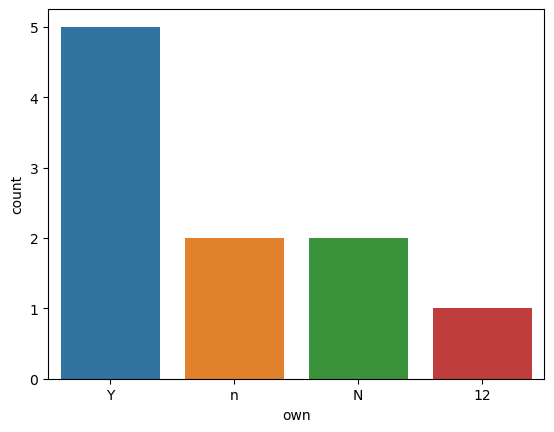

In [31]:
sns.countplot(x='own', data=df)
plt.show()

In [32]:
#count by use list 

In [39]:
cols_to_check = df.select_dtypes(include='object').columns
cols_to_check = cols_to_check.append(df.select_dtypes(include='category').columns)
cols_to_check

Index(['id', 'own', 'bathroom', 'area'], dtype='object')

In [41]:
cols_to_check = ['own', 'bathroom', 'area']
for colm in cols_to_check:
    print(colm)
    colm_vals = df[colm].unique()
    for k in colm_vals:
        print(' |{}'.format(k))
    print('-------------------------')

own
 |Y
 |n
 |N
 |nan
 |12
-------------------------
bathroom
 |1
 |-2
 |2ABC
 |1.5
 |3
 |2
-------------------------
area
 |1000
 |--
 |850
 |700.5
 |1600
 |800.8
 |950
 |nan
 |1800
 |90.5
 |70.2
-------------------------


In [42]:
df.own = df.own.str.upper() 

In [44]:
colm = 'own'
df.groupby(colm)[colm].count()

own
12    1
N     4
Y     5
Name: own, dtype: int64

In [45]:
df.to_csv('data/data_clean2_after_str_upper.csv', index=False)

In [46]:
#check 'bedroom'
colm = 'bedroom'
df.groupby(colm)[colm].count()

bedroom
1.0    2
2.0    5
3.0    3
Name: bedroom, dtype: int64

In [47]:
#check 'bathroom'
colm = 'bathroom'
df.groupby(colm)[colm].count()

bathroom
-2      1
1       4
1.5     1
2       3
2ABC    1
3       1
Name: bathroom, dtype: int64

In [48]:
#ใช้ loop for checking columns

In [49]:
cols_to_check = ['own', 'bedroom', 'bathroom']
for i,col in enumerate(cols_to_check):
    print(df.groupby(col)[cols_to_check[i]].count().head(25))
    print('----------------')

own
12    1
N     4
Y     5
Name: own, dtype: int64
----------------
bedroom
1.0    2
2.0    5
3.0    3
Name: bedroom, dtype: int64
----------------
bathroom
-2      1
1       4
1.5     1
2       3
2ABC    1
3       1
Name: bathroom, dtype: int64
----------------


In [50]:
#assume that '12' in 'own' column is the data that Caused by filling in incorrect information

In [51]:
df.dtypes

id           object
own          object
bedroom     float64
bathroom     object
area         object
dtype: object

In [52]:
df[df.own == '12']

,id,own,bedroom,bathroom,area
10,Jib,12,2.0,2,70.2


In [53]:
df.loc[10]

id           Jib
own           12
bedroom      2.0
bathroom       2
area        70.2
Name: 10, dtype: object

In [60]:
df.at[10,'own'] = 'Y'

In [61]:
df.loc[10]

id           Jib
own            Y
bedroom      2.0
bathroom       2
area        70.2
Name: 10, dtype: object

In [73]:
df.at[10,'own'] = '12' #back for next workshop

In [62]:
#relize that '12' is the wrong infomation delete it

In [74]:
problem_idx = df[(df.own != 'Y') & (df.own != 'N') & (df.own.notnull())].index

In [75]:
df.loc[problem_idx]

,id,own,bedroom,bathroom,area
10,Jib,12,2.0,2,70.2


In [77]:
df.drop(problem_idx, inplace =True)

In [78]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [81]:
df = pd.read_csv('data/data_clean2_after_str_upper.csv')

In [82]:
print(df.dtypes)

id           object
own          object
bedroom     float64
bathroom     object
area         object
dtype: object


In [83]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [87]:
df[(df.own == 'Y') | (df.own == 'N') | df.own.isnull()]

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [88]:
df = df[(df.own == 'Y') | (df.own == 'N') | df.own.isnull()]

In [89]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [90]:
df.groupby('own').own.count()

own
N    4
Y    5
Name: own, dtype: int64

In [92]:
df.to_csv('data/data_clean3_after_clean_own.csv', index =False)

In [ ]:
# delete number out of column that have a type object/string

In [93]:
df = pd.read_csv('data/data_clean2_after_str_upper.csv')

In [94]:
print(df.dtypes)

id           object
own          object
bedroom     float64
bathroom     object
area         object
dtype: object


In [95]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [96]:
# change number to NaN

In [99]:
def detect_num(dataframe, column_name):
    cnt=0
    for row in dataframe[column_name]:
        try:
            #int(row)
            float(row)
            dataframe.loc[cnt, column_name] = np.nan
        except ValueError:
            pass
        cnt+=1
    return(dataframe)


df = detect_num(df.copy(),'own')

In [ ]:
#หลักการทำงาน โดย loop to read every value in column then try to change every value to  float or int if it  success to change mean this is the stranger infomation so we will change this value to NaN and order to delete later

In [100]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [101]:
df.dropna(subset=['own'], inplace = True)

In [102]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [120]:
df = pd.read_csv('data/data_clean2_after_str_upper.csv')

In [121]:
def detect_num(dataframe, column_name):
    cnt=0
    for row in dataframe[column_name]:
        try:
            #int(row)
            float(row)
            dataframe.loc[cnt, column_name] = np.nan
        except ValueError:
            pass
        cnt+=1
    return(dataframe)


df = detect_num(df.copy(),'own')

In [122]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000
1,แนน,N,3.0,1,--
2,Lam,N,NaN,1,850
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600
5,Tom,Y,3.0,1.5,800.8
6,Green,NaN,2.0,3,950
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800
9,Ksb,N,2.0,2,90.5


In [123]:
pd.options.mode.chained_assignment = None

In [124]:
df['area_num'] = pd.to_numeric(df.area, errors= 'coerce', downcast ='float') 

In [125]:
df

,id,own,bedroom,bathroom,area,area_num
0,กอบ,Y,3.0,1,1000,1000.000000
1,แนน,N,3.0,1,--,NaN
2,Lam,N,NaN,1,850,850.000000
3,Ninan,N,1.0,-2,700.5,700.500000
4,Nii,Y,2.0,2ABC,1600,1600.000000
5,Tom,Y,3.0,1.5,800.8,800.799988
6,Green,NaN,2.0,3,950,950.000000
7,Shasa,Y,1.0,1,NaN,NaN
8,Alisa,Y,2.0,2,1800,1800.000000
9,Ksb,N,2.0,2,90.5,90.500000


In [126]:
df.dtypes

id           object
own          object
bedroom     float64
bathroom     object
area         object
area_num    float32
dtype: object

In [127]:
df['area'] = pd.to_numeric(df.area, errors = 'coerce', downcast ='float')

In [128]:
df.describe()

,bedroom,area,area_num
count,10.000000,9.000000,9.000000
mean,2.100000,873.555542,873.555542
std,0.737865,581.184692,581.184692
min,1.000000,70.199997,70.199997
25%,2.000000,700.500000,700.500000
50%,2.000000,850.000000,850.000000
75%,2.750000,1000.000000,1000.000000
max,3.000000,1800.000000,1800.000000


In [129]:
df[df.area_num.isnull()]

,id,own,bedroom,bathroom,area,area_num
1,แนน,N,3.0,1,NaN,NaN
7,Shasa,Y,1.0,1,NaN,NaN


In [130]:
df[df.area_num.notnull()]

,id,own,bedroom,bathroom,area,area_num
0,กอบ,Y,3.0,1,1000.000000,1000.000000
2,Lam,N,NaN,1,850.000000,850.000000
3,Ninan,N,1.0,-2,700.500000,700.500000
4,Nii,Y,2.0,2ABC,1600.000000,1600.000000
5,Tom,Y,3.0,1.5,800.799988,800.799988
6,Green,NaN,2.0,3,950.000000,950.000000
8,Alisa,Y,2.0,2,1800.000000,1800.000000
9,Ksb,N,2.0,2,90.500000,90.500000
10,Jib,NaN,2.0,2,70.199997,70.199997


In [131]:
df.drop(columns='area', inplace=True)

In [132]:
df.head()

,id,own,bedroom,bathroom,area_num
0,กอบ,Y,3.0,1,1000.0
1,แนน,N,3.0,1,NaN
2,Lam,N,NaN,1,850.0
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600.0


In [133]:
df.dtypes

id           object
own          object
bedroom     float64
bathroom     object
area_num    float32
dtype: object

In [134]:
df.rename(columns={'area_num':'area'}, inplace = True)

In [135]:
df.head()

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000.0
1,แนน,N,3.0,1,NaN
2,Lam,N,NaN,1,850.0
3,Ninan,N,1.0,-2,700.5
4,Nii,Y,2.0,2ABC,1600.0


In [136]:
df.dtypes

id           object
own          object
bedroom     float64
bathroom     object
area        float32
dtype: object

In [138]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000.000000
1,แนน,N,3.0,1,NaN
2,Lam,N,NaN,1,850.000000
3,Ninan,N,1.0,-2,700.500000
4,Nii,Y,2.0,2ABC,1600.000000
5,Tom,Y,3.0,1.5,800.799988
6,Green,NaN,2.0,3,950.000000
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800.000000
9,Ksb,N,2.0,2,90.500000


In [141]:
df.bathroom = pd.to_numeric(df.bathroom, errors='coerce', downcast='integer')

In [142]:
df.dtypes

id           object
own          object
bedroom     float64
bathroom    float64
area        float32
dtype: object

In [143]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1.0,1000.000000
1,แนน,N,3.0,1.0,NaN
2,Lam,N,NaN,1.0,850.000000
3,Ninan,N,1.0,-2.0,700.500000
4,Nii,Y,2.0,NaN,1600.000000
5,Tom,Y,3.0,1.5,800.799988
6,Green,NaN,2.0,3.0,950.000000
7,Shasa,Y,1.0,1.0,NaN
8,Alisa,Y,2.0,2.0,1800.000000
9,Ksb,N,2.0,2.0,90.500000


In [144]:
def float2int(val): 
    if val % 1 == 0:
        return int(val)
    else: 
        return np.nan

In [145]:
df.bathroom = df.bathroom.apply(float2int)

In [146]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1.0,1000.000000
1,แนน,N,3.0,1.0,NaN
2,Lam,N,NaN,1.0,850.000000
3,Ninan,N,1.0,-2.0,700.500000
4,Nii,Y,2.0,NaN,1600.000000
5,Tom,Y,3.0,NaN,800.799988
6,Green,NaN,2.0,3.0,950.000000
7,Shasa,Y,1.0,1.0,NaN
8,Alisa,Y,2.0,2.0,1800.000000
9,Ksb,N,2.0,2.0,90.500000


In [147]:
df = df[df.bathroom.notnull()]

In [148]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1.0,1000.000000
1,แนน,N,3.0,1.0,NaN
2,Lam,N,NaN,1.0,850.000000
3,Ninan,N,1.0,-2.0,700.500000
6,Green,NaN,2.0,3.0,950.000000
7,Shasa,Y,1.0,1.0,NaN
8,Alisa,Y,2.0,2.0,1800.000000
9,Ksb,N,2.0,2.0,90.500000
10,Jib,NaN,2.0,2.0,70.199997


In [150]:
df.bathroom = df.bathroom.astype(int)

In [151]:
df.dtypes

id           object
own          object
bedroom     float64
bathroom      int64
area        float32
dtype: object

In [154]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000.000000
1,แนน,N,3.0,1,NaN
2,Lam,N,NaN,1,850.000000
3,Ninan,N,1.0,-2,700.500000
6,Green,NaN,2.0,3,950.000000
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800.000000
9,Ksb,N,2.0,2,90.500000
10,Jib,NaN,2.0,2,70.199997


In [155]:
(df.bathroom <= 0).sum()

1

In [156]:
df[df.bathroom <= 0]

,id,own,bedroom,bathroom,area
3,Ninan,N,1.0,-2,700.5


In [157]:
df = df[df.bathroom > 0]

In [158]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000.000000
1,แนน,N,3.0,1,NaN
2,Lam,N,NaN,1,850.000000
6,Green,NaN,2.0,3,950.000000
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800.000000
9,Ksb,N,2.0,2,90.500000
10,Jib,NaN,2.0,2,70.199997


In [159]:
df.bathroom  = df.bathroom.astype('category')

In [160]:
df.dtypes

id            object
own           object
bedroom      float64
bathroom    category
area         float32
dtype: object

In [161]:
df = df[df.bedroom.notnull()]

In [162]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3.0,1,1000.000000
1,แนน,N,3.0,1,NaN
6,Green,NaN,2.0,3,950.000000
7,Shasa,Y,1.0,1,NaN
8,Alisa,Y,2.0,2,1800.000000
9,Ksb,N,2.0,2,90.500000
10,Jib,NaN,2.0,2,70.199997


In [163]:
df.bedroom = df.bedroom.astype('int')

In [164]:
df.bedroom = df.bedroom.astype('category')

In [165]:
df.dtypes

id            object
own           object
bedroom     category
bathroom    category
area         float32
dtype: object

In [166]:
df.to_csv('data/data_clean5_.csv', index=False)

In [171]:
#manage duplicate data

In [168]:
df = pd.read_csv('data/data_clean6_after_clean_bedroom_dup.csv')

In [169]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3,1,1000.0
1,แนน,N,3,1,NaN
2,Green,NaN,2,3,950.0
3,Shasa,Y,1,1,NaN
4,Alisa,Y,2,2,1800.0
5,Alisa,Y,2,2,1200.0
6,Ksb,N,2,2,90.5
7,Ksb,N,2,2,90.5
8,Jib,NaN,2,2,70.2


In [170]:
df[df.duplicated()]

,id,own,bedroom,bathroom,area
7,Ksb,N,2,2,90.5


In [172]:
df.drop_duplicates(inplace=True)

In [173]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3,1,1000.0
1,แนน,N,3,1,NaN
2,Green,NaN,2,3,950.0
3,Shasa,Y,1,1,NaN
4,Alisa,Y,2,2,1800.0
5,Alisa,Y,2,2,1200.0
6,Ksb,N,2,2,90.5
8,Jib,NaN,2,2,70.2


In [174]:
df.drop_duplicates(subset='id', inplace=True)

In [175]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3,1,1000.0
1,แนน,N,3,1,NaN
2,Green,NaN,2,3,950.0
3,Shasa,Y,1,1,NaN
4,Alisa,Y,2,2,1800.0
6,Ksb,N,2,2,90.5
8,Jib,NaN,2,2,70.2


In [176]:
df.sort_values('area', inplace=True)

In [177]:
df.drop_duplicates(subset='id', inplace=True)

In [178]:
df

,id,own,bedroom,bathroom,area
8,Jib,NaN,2,2,70.2
6,Ksb,N,2,2,90.5
2,Green,NaN,2,3,950.0
0,กอบ,Y,3,1,1000.0
4,Alisa,Y,2,2,1800.0
1,แนน,N,3,1,NaN
3,Shasa,Y,1,1,NaN


In [179]:
(df.area<=0).sum()

0

In [180]:
(df.bathroom <= 0).sum()

0

In [181]:
(df.bedroom <= 0).sum()

0

In [182]:
df.isnull().sum()

id          0
own         2
bedroom     0
bathroom    0
area        2
dtype: int64

In [183]:
cols_to_check = ['own', 'bedroom', 'bathroom']
for i, col in enumerate(cols_to_check):
    print(df.groupby(col)[cols_to_check[i]].count().head(5))
    print('-----------------------')

own
N    2
Y    3
Name: own, dtype: int64
-----------------------
bedroom
1    1
2    4
3    2
Name: bedroom, dtype: int64
-----------------------
bathroom
1    3
2    3
3    1
Name: bathroom, dtype: int64
-----------------------


In [186]:
df = pd.read_csv('data/data_clean6_after_clean_bedroom_dup.csv', 
                 dtype={'bedroom':'category', 'bathroom':'category'})

df.dtypes

id            object
own           object
bedroom     category
bathroom    category
area         float64
dtype: object

In [187]:
df

,id,own,bedroom,bathroom,area
0,กอบ,Y,3,1,1000.0
1,แนน,N,3,1,NaN
2,Green,NaN,2,3,950.0
3,Shasa,Y,1,1,NaN
4,Alisa,Y,2,2,1800.0
5,Alisa,Y,2,2,1200.0
6,Ksb,N,2,2,90.5
7,Ksb,N,2,2,90.5
8,Jib,NaN,2,2,70.2


In [188]:
df.describe()

,area
count,7.000000
mean,743.028571
std,675.668599
min,70.200000
25%,90.500000
50%,950.000000
75%,1100.000000
max,1800.000000
